# Using SDKs
## Exploratory Data Analysis

In [1]:
import logging

# Configure the root logger
logging.basicConfig(
    level=logging.DEBUG,  # 👈 this enables DEBUG level output
    format="%(asctime)s [%(levelname)s] %(name)s - %(message)s"
)


Import SDK and supporting libraries

In [2]:
from swcpy.swc_client import SWCClient
from swcpy.swc_config import SWCConfig
import pandas as pd

In [3]:
config = SWCConfig(bulk_file_format="parquet")
client = SWCClient(config)    

2025-10-09 22:39:17,640 [DEBUG] swcpy.swc_client - Bulk file base URL: https://github.com/handsonapibook/api-book-part-one/raw/refs/heads/main/bulk/
2025-10-09 22:39:17,641 [DEBUG] swcpy.swc_client - Input config: https://api.sportsworldcentral.com/ True 30  parquet
2025-10-09 22:39:17,643 [DEBUG] swcpy.swc_client - Bulk file dictionary: {'players': 'player_data.parquet', 'leagues': 'league_data.parquet', 'performances': 'performance_data.parquet', 'teams': 'team_data.parquet', 'team_players': 'team_player_data.parquet'}


SWC_API_BASE_URL in SWCConfig init: https://api.sportsworldcentral.com/


In [4]:
sdk_player_list = client.list_players()
df = pd.DataFrame([player.model_dump() for player in sdk_player_list])
display(df)

2025-10-09 22:39:23,539 [DEBUG] swcpy.swc_client - Entered list players
2025-10-09 22:39:23,622 [DEBUG] swcpy.swc_client - base_url: https://api.sportsworldcentral.com/, api_endpoint: /v0/players/, api_params: {'skip': 0, 'limit': 100}
2025-10-09 22:39:23,623 [DEBUG] httpcore.connection - connect_tcp.started host='api.sportsworldcentral.com' port=443 local_address=None timeout=5.0 socket_options=None
2025-10-09 22:39:23,853 [DEBUG] httpcore.connection - connect_tcp.complete return_value=<httpcore._backends.sync.SyncStream object at 0x709d70788bc0>
2025-10-09 22:39:23,854 [DEBUG] httpcore.connection - start_tls.started ssl_context=<ssl.SSLContext object at 0x709d6a5690d0> server_hostname='api.sportsworldcentral.com' timeout=5.0
2025-10-09 22:39:24,029 [DEBUG] httpcore.connection - start_tls.complete return_value=<httpcore._backends.sync.SyncStream object at 0x709d6ad38470>
2025-10-09 22:39:24,029 [DEBUG] httpcore.http11 - send_request_headers.started request=<Request [b'GET']>
2025-10-0

,player_id,gsis_id,first_name,last_name,position,last_changed_date,performances
0,1001,00-0023459,Aaron,Rodgers,QB,2024-04-18,"[{'performance_id': 2501, 'player_id': 1001, '..."
1,1002,00-0023853,Matt,Prater,K,2024-04-18,"[{'performance_id': 2502, 'player_id': 1002, '..."
2,1003,00-0024243,Marcedes,Lewis,TE,2024-04-18,"[{'performance_id': 2503, 'player_id': 1003, '..."
3,1004,00-0025565,Nick,Folk,K,2024-04-18,"[{'performance_id': 2504, 'player_id': 1004, '..."
4,1005,00-0025580,Mason,Crosby,K,2024-04-18,"[{'performance_id': 2505, 'player_id': 1005, '..."
...,...,...,...,...,...,...,...
95,1096,00-0032392,Austin,Hooper,TE,2024-04-18,"[{'performance_id': 2596, 'player_id': 1096, '..."
96,1097,00-0032394,Nick,Vannett,TE,2024-04-18,"[{'performance_id': 2597, 'player_id': 1097, '..."
97,1098,00-0032398,Chris,Moore,WR,2024-04-18,"[{'performance_id': 2598, 'player_id': 1098, '..."
98,1099,00-0032434,Brandon,Allen,QB,2024-04-18,"[{'performance_id': 2599, 'player_id': 1099, '..."


In [5]:
df["performance_count"] = df["performances"].apply(len)
display(df)

,player_id,gsis_id,first_name,last_name,position,last_changed_date,performances,performance_count
0,1001,00-0023459,Aaron,Rodgers,QB,2024-04-18,"[{'performance_id': 2501, 'player_id': 1001, '...",17
1,1002,00-0023853,Matt,Prater,K,2024-04-18,"[{'performance_id': 2502, 'player_id': 1002, '...",17
2,1003,00-0024243,Marcedes,Lewis,TE,2024-04-18,"[{'performance_id': 2503, 'player_id': 1003, '...",17
3,1004,00-0025565,Nick,Folk,K,2024-04-18,"[{'performance_id': 2504, 'player_id': 1004, '...",17
4,1005,00-0025580,Mason,Crosby,K,2024-04-18,"[{'performance_id': 2505, 'player_id': 1005, '...",17
...,...,...,...,...,...,...,...,...
95,1096,00-0032392,Austin,Hooper,TE,2024-04-18,"[{'performance_id': 2596, 'player_id': 1096, '...",17
96,1097,00-0032394,Nick,Vannett,TE,2024-04-18,"[{'performance_id': 2597, 'player_id': 1097, '...",17
97,1098,00-0032398,Chris,Moore,WR,2024-04-18,"[{'performance_id': 2598, 'player_id': 1098, '...",17
98,1099,00-0032434,Brandon,Allen,QB,2024-04-18,"[{'performance_id': 2599, 'player_id': 1099, '...",17


In [6]:
df["performance_count"].describe()


count    100.0
mean      17.0
std        0.0
min       17.0
25%       17.0
50%       17.0
75%       17.0
max       17.0
Name: performance_count, dtype: float64

In [7]:
df.head()        # first 5 rows
df.tail()        # last 5 rows
df.shape         # (rows, columns)
df.info()        # column types, non-null counts
df.describe()    # summary stats for numeric columns
df.dtypes        # check data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   player_id          100 non-null    int64 
 1   gsis_id            100 non-null    object
 2   first_name         100 non-null    object
 3   last_name          100 non-null    object
 4   position           100 non-null    object
 5   last_changed_date  100 non-null    object
 6   performances       100 non-null    object
 7   performance_count  100 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 6.4+ KB


player_id             int64
gsis_id              object
first_name           object
last_name            object
position             object
last_changed_date    object
performances         object
performance_count     int64
dtype: object

In [8]:
df.isna().sum()                 # count missing values per column
#df.duplicated().sum()           # check duplicate rows
df["player_id"].is_unique       # confirm unique IDs


True

In [9]:
player_file = client.get_bulk_player_file()
type(player_file)
print(player_file)


2025-10-09 22:39:47,258 [DEBUG] swcpy.swc_client - Entered get bulk player file
2025-10-09 22:39:47,300 [DEBUG] httpcore.connection - connect_tcp.started host='github.com' port=443 local_address=None timeout=5.0 socket_options=None
2025-10-09 22:39:47,310 [DEBUG] httpcore.connection - connect_tcp.complete return_value=<httpcore._backends.sync.SyncStream object at 0x709d6a41bf20>
2025-10-09 22:39:47,310 [DEBUG] httpcore.connection - start_tls.started ssl_context=<ssl.SSLContext object at 0x709d90d6b750> server_hostname='github.com' timeout=5.0
2025-10-09 22:39:47,321 [DEBUG] httpcore.connection - start_tls.complete return_value=<httpcore._backends.sync.SyncStream object at 0x709d92eb7e60>
2025-10-09 22:39:47,322 [DEBUG] httpcore.http11 - send_request_headers.started request=<Request [b'GET']>
2025-10-09 22:39:47,323 [DEBUG] httpcore.http11 - send_request_headers.complete
2025-10-09 22:39:47,324 [DEBUG] httpcore.http11 - send_request_body.started request=<Request [b'GET']>
2025-10-09 22:

b'PAR1\x15\x04\x15\xa0\x7f\x15\xee?L\x15\xf4\x0f\x15\x00\x12\x00\x00\xd0?\x08\xe9\x03\x00\x05\x01\x00\xea\r\x08\x00\xeb\r\x08\x00\xec\r\x08\x00\xed\r\x08\x00\xee\r\x08\x00\xef\r\x08\x00\xf0\r\x08\x00\xf1\r\x08\x00\xf2\r\x08\x00\xf3\r\x08\x00\xf4\r\x08\x00\xf5\r\x08\x00\xf6\r\x08\x00\xf7\r\x08\x00\xf8\r\x08\x00\xf9\r\x08\x00\xfa\r\x08\x00\xfb\r\x08\x00\xfc\r\x08\x00\xfd\r\x08\x00\xfe\r\x08\x00\xff\r\x08\x04\x00\x04\x05\xb7\x04\x00\x01\r\x08\x00\x02\r\x08\x00\x03\r\x08\x00\x04\r\x08\x00\x05\r\x08\x00\x06\r\x08\x00\x07\r\x08\x00\x08\r\x08\x00\t\r\x08\x00\n\r\x08\x00\x0b\r\x08\x00\x0c\r\x08\x00\r\r\x08\x00\x0e\r\x08\x00\x0f\r\x08\x00\x10\r\x08\x00\x11\r\x08\x00\x12\r\x08\x00\x13\r\x08\x00\x14\r\x08\x00\x15\r\x08\x00\x16\r\x08\x00\x17\r\x08\x00\x18\r\x08\x00\x19\r\x08\x00\x1a\r\x08\x00\x1b\r\x08\x00\x1c\r\x08\x00\x1d\r\x08\x00\x1e\r\x08\x00\x1f\r\x08\x00 \r\x08\x00!\r\x08\x00"\r\x08\x00#\r\x08\x00$\r\x08\x00%\r\x08\x00&\r\x08\x00\'\r\x08\x00(\r\x08\x00)\r\x08\x00*\r\x08\x00+\r\x08\x00,\r\x0

In [10]:


output_file_path = 'playes_file.parquet'
with open(output_file_path, 'wb') as f:
    f.write(player_file)

EDA with polars

In [12]:
import io
import polars as pl

buffer = io.BytesIO(player_file)
df = pl.read_parquet(buffer)

# Basic info
print(df.shape)
print(df.head())
print(df.describe())


(1018, 6)
shape: (5, 6)
┌───────────┬────────────┬────────────┬───────────┬──────────┬───────────────────┐
│ player_id ┆ gsis_id    ┆ first_name ┆ last_name ┆ position ┆ last_changed_date │
│ ---       ┆ ---        ┆ ---        ┆ ---       ┆ ---      ┆ ---               │
│ i64       ┆ str        ┆ str        ┆ str       ┆ str      ┆ str               │
╞═══════════╪════════════╪════════════╪═══════════╪══════════╪═══════════════════╡
│ 1001      ┆ 00-0023459 ┆ Aaron      ┆ Rodgers   ┆ QB       ┆ 2024-04-18        │
│ 1002      ┆ 00-0023853 ┆ Matt       ┆ Prater    ┆ K        ┆ 2024-04-18        │
│ 1003      ┆ 00-0024243 ┆ Marcedes   ┆ Lewis     ┆ TE       ┆ 2024-04-18        │
│ 1004      ┆ 00-0025565 ┆ Nick       ┆ Folk      ┆ K        ┆ 2024-04-18        │
│ 1005      ┆ 00-0025580 ┆ Mason      ┆ Crosby    ┆ K        ┆ 2024-04-18        │
└───────────┴────────────┴────────────┴───────────┴──────────┴───────────────────┘
shape: (9, 7)
┌────────────┬────────────┬────────────┬─────────

2025-10-09 22:41:25,585 [DEBUG] matplotlib - matplotlib data path: /home/codespace/.local/lib/python3.12/site-packages/matplotlib/mpl-data
2025-10-09 22:41:25,660 [DEBUG] matplotlib - CONFIGDIR=/home/codespace/.config/matplotlib
2025-10-09 22:41:25,687 [DEBUG] matplotlib - interactive is False
2025-10-09 22:41:25,687 [DEBUG] matplotlib - platform is linux
2025-10-09 22:41:25,965 [DEBUG] matplotlib - CACHEDIR=/home/codespace/.cache/matplotlib
2025-10-09 22:41:25,966 [DEBUG] matplotlib.font_manager - font search path [PosixPath('/home/codespace/.local/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf'), PosixPath('/home/codespace/.local/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/afm'), PosixPath('/home/codespace/.local/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts')]
2025-10-09 22:41:27,444 [INFO] matplotlib.font_manager - generated new fontManager
2025-10-09 22:41:28,050 [DEBUG] matplotlib.pyplot - Loaded backend module://matplotlib_inline.back

array([[<Axes: title={'center': 'player_id'}>]], dtype=object)

2025-10-09 22:41:28,161 [DEBUG] matplotlib.font_manager - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2025-10-09 22:41:28,162 [DEBUG] matplotlib.font_manager - findfont: score(FontEntry(fname='/home/codespace/.local/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2025-10-09 22:41:28,163 [DEBUG] matplotlib.font_manager - findfont: score(FontEntry(fname='/home/codespace/.local/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2025-10-09 22:41:28,163 [DEBUG] matplotlib.font_manager - findfont: score(FontEntry(fname='/home/codespace/.local/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral', style='

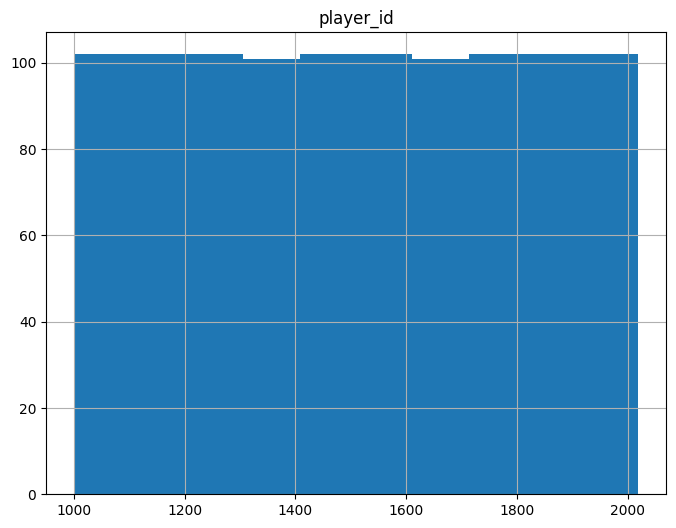

In [13]:
df.to_pandas().hist(figsize=(8, 6))
